In [85]:
# Dataset: Natural Language to Python Code
#Author: Link An Jarad
# Source: Link An Jarad. (2022). Natural Language to Python Code [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/3512475
# URL: https://www.kaggle.com/datasets/linkanjarad/coding-problems-and-solution-python-code
# Description: Link An Jarad (2022) developed this data set to generate python code
# from Natural Language Text with code functionality descriptions.

In [86]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re


In [87]:
#Dataset is Loaded to df_raw Dataframe
df_raw = pd.read_csv('../data/raw/Kaggel/ProblemSolutionPythonV3.csv')

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307 entries, 0 to 3306
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3307 non-null   int64 
 1   Problem      3307 non-null   object
 2   Python Code  3306 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.6+ KB


In [88]:
#Dataset contains 3307 rows, with 3 columns 
#First column does not provides any valid information as it is not labeled and it is not described on the Data Dictionary
#'Python Code' Column contains a Null entry.
#Both 'Problem' and 'Python Code' Columns are strings (object)

In [89]:
df_raw.shape

(3307, 3)

In [90]:
df_raw.sample(10, random_state=2010)

,Unnamed: 0,Problem,Python Code
3290,3290,Find out all Sunny numbers present within a given range,"\nimport math\nprint(""Enter a range:"")\nrange1=int(input())\nrange2=int(input())\nprint(""Sunny numbers between "",range1,"" and "",range2,"" are: "")\nfor i in range(range1,range2+1):\n root = math.sqrt(i+ 1)\n if int(root)==root:\n print(i,end="" "")"
450,450,Write a Python program to remove newline characters from a file.,"def remove_newlines(fname):\r flist = open(fname).readlines()\r return [s.rstrip('\n') for s in flist]\r\rprint(remove_newlines(""test.txt""))\r"
1847,1847,Write a Python program to Merging two Dictionaries,"# Python code to merge dict using update() method\ndef Merge(dict1, dict2):\n return(dict2.update(dict1))\n \n# Driver code\ndict1 = {'a': 10, 'b': 8}\ndict2 = {'d': 6, 'c': 4}\n\n\n# This return None\nprint(Merge(dict1, dict2))\n\n\n# changes made in dict2\nprint(dict2)"
2551,2551,Python Program to Determine all Pythagorean Triplets in the Range,"limit=int(input(""Enter upper limit:""))\nc=0\nm=2\nwhile(c<limit):\n for n in range(1,m+1):\n a=m*m-n*n\n b=2*m*n\n c=m*m+n*n\n if(c>limit):\n break\n if(a==0 or b==0 or c==0):\n break\n print(a,b,c)\n m=m+1"
3167,3167,Python Program to Compute Simple Interest Given all the Required Values,"\nprinciple=float(input(""Enter the principle amount:""))\ntime=int(input(""Enter the time(years):""))\nrate=float(input(""Enter the rate:""))\nsimple_interest=(principle*time*rate)/100\nprint(""The simple interest is:"",simple_interest)"
1082,1082,"Write a Python program to get a string from a given string where all occurrences of its first char have been changed to '$', except the first char itself.","def change_char(str1):\r char = str1[0]\r str1 = str1.replace(char, '$')\r str1 = char + str1[1:]\r\r return str1\r\rprint(change_char('restart'))\r"
990,990,Write a Pandas program to subtract two timestamps of same time zone or different time zone.,"import pandas as pd\rprint(""Subtract two timestamps of same time zone:"")\rdate1 = pd.Timestamp('2019-03-01 12:00', tz='US/Eastern')\rdate2 = pd.Timestamp('2019-04-01 07:00', tz='US/Eastern')\rprint(""Difference: "", (date2-date1))\rprint(""\nSubtract two timestamps of different time zone:"")\rdate1 = pd.Timestamp('2019-03-01 12:00', tz='US/Eastern')\rdate2 = pd.Timestamp('2019-03-01 07:00', tz='US/Pacific')\r# Remove the time zone and do the subtraction\rprint(""Difference: "", (date1.tz_localize(None) - date2.tz_localize(None)))\r"
3297,3297,Find sum multiplication and an average of two numbers,"\nnum1=int(input(""Enter a number:""))\nnum2=int(input(""Enter a number:""))\n\naddition=num1+num2\nmultiplication=num1*num2\naverage=(num1+num2)/2\n\nprint(""Addition ="",addition)\nprint(""Multiplication ="",multiplication)\nprint(""Average ="",average)\n"
221,221,Write a Pandas program to find which years have all non-zero values and which years have any non-zero values from world alcohol consumption dataset.,"import pandas as pd \r\r# World alcohol consumption data\rw_a_con = pd.read_csv('world_alcohol.csv')\rprint(""World alcohol consumption sample data:"")\rprint(w_a_con.head())\rprint(""\nFind which years have all non-zero values:"")\rprint(w_a_con.loc[:,w_a_con.all()])\rprint(""\nFind which years have any non-zero values:"")\rprint(w_a_con.loc[:,w_a_con.any()])\r"
1748,1748,Write a Python program to Convert List to List of dictionaries,"# Python3 code to demonstrate working of \n# Convert List to List of dictionaries\n# Using dictionary comprehension + loop\n \n# initializing lists\ntest_list = [""Gfg"", 3, ""is"", 8, ""Best"", 10, ""for"", 18, ""Geeks"", 33]\n \n# printing original list\nprint(""The original list : "" + str(test_list))\n \n# initializing key list \nkey_list = [""name"", ""number""]\n \n# loop to iterate through elements\n# using dictionary comprehension\n# for dictionary construction\nn = len(test_list)\nres = []\nfor idx in range(0, n, 2):\n res.append({key_list[0]: test_list[idx], key_list[1] : test_list[

In [91]:
#From multiple samples of the raw data, it is visible that the Python Code column contains multiple symbol characters, like single 
#quotes, curly braces, square brackets, line jump, and more.

#Problem Column also contains symbol characters like $, -, (, ), and more.


In [92]:
df_raw.columns

Index(['Unnamed: 0', 'Problem', 'Python Code'], dtype='object')

In [93]:
#Drop 'Unnamed: 0' Column as it is an unnecesary column.
df_processed = df_raw.drop(df_raw.columns[0], axis=1).copy()

df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307 entries, 0 to 3306
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Problem      3307 non-null   object
 1   Python Code  3306 non-null   object
dtypes: object(2)
memory usage: 51.8+ KB


In [94]:
#NAN Values are droped from the Dataset
df_processed.isna().sum()

Problem        0
Python Code    1
dtype: int64

In [95]:
df_processed = df_processed.dropna(axis=0, how='any') #drop every row were there is column with a Nan value

df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3306 entries, 0 to 3306
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Problem      3306 non-null   object
 1   Python Code  3306 non-null   object
dtypes: object(2)
memory usage: 77.5+ KB


In [96]:
df_processed.sample(10)

,Problem,Python Code
565,"Write a Python program to retrieve the HTML code of the title, its text, and the HTML code of its parent.","import requests\rfrom bs4 import BeautifulSoup\rurl = 'https://www.python.org/'\rreqs = requests.get(url)\rsoup = BeautifulSoup(reqs.text, 'lxml')\rprint(""title"")\rprint(soup.title)\rprint(""title text"")\rprint(soup.title.text)\rprint(""Parent content of the title:"")\rprint(soup.title.parent)\r"
1628,Write a Python program to group the elements of a list based on the given function and returns the count of elements in each group.,"from collections import defaultdict\rdef count_by(lst, fn = lambda x: x):\r count = defaultdict(int)\r for val in map(fn, lst):\r count[val] += 1\r return dict(count)\rfrom math import floor\rprint(count_by([6.1, 4.2, 6.3], floor)) \rprint(count_by(['one', 'two', 'three'], len))\r"
2573,Program to compute the perimeter of Trapezoid,"\n\nprint(""Enter the value of base:"")\na=int(input())\nb=int(input())\nprint(""Enter the value of side:"")\nc=int(input())\nd=int(input())\nperimeter=a+b+c+d\nprint(""Perimeter of the Trapezoid = "",perimeter)\n"
1208,Write a NumPy program to find the roots of the following polynomials.,"import numpy as np\rprint(""Roots of the first polynomial:"")\rprint(np.roots([1, -2, 1]))\rprint(""Roots of the second polynomial:"")\rprint(np.roots([1, -12, 10, 7, -10]))\r"
223,Write a Python program to display a number with a comma separator.,"x = 3000000\ry = 30000000\rprint(""\nOriginal Number: "", x)\rprint(""Formatted Number with comma separator: ""+""{:,}"".format(x));\rprint(""Original Number: "", y)\rprint(""Formatted Number with comma separator: ""+""{:,}"".format(y));\rprint()\r"
3131,Python Program to Implement Queue Data Structure using Linked List,"class Node:\n def __init__(self, data):\n self.data = data\n self.next = None\n \nclass Queue:\n def __init__(self):\n self.head = None\n self.last = None\n \n def enqueue(self, data):\n if self.last is None:\n self.head = Node(data)\n self.last = self.head\n else:\n self.last.next = Node(data)\n self.last = self.last.next\n \n def dequeue(self):\n if self.head is None:\n return None\n else:\n to_return = self.head.data\n self.head = self.head.next\n return to_return\n \na_queue = Queue()\nwhile True:\n print('enqueue <value>')\n print('dequeue')\n print('quit')\n do = input('What would you like to do? ').split()\n \n operation = do[0].strip().lower()\n if operation == 'enqueue':\n a_queue.enqueue(int(do[1]))\n elif operation == 'dequeue':\n dequeued = a_queue.dequeue()\n if dequeued is None:\n print('Queue is empty.')\n else:\n print('Dequeued element: ', int(dequeued))\n elif operation == 'quit':\n break"
2801,Program to Find the nth Palindrome Number,"\nrangenumber=int(input(""Enter a Nth Number:""))\nc = 0\nletest = 0\nnum = 1\nwhile c != rangenumber:\n num2=0\n num1 = num\n while num1 != 0:\n rem = num1 % 10\n num1 //= 10\n num2 = num2 * 10 + rem\n if num==num2:\n c+=1\n letest = num\n\n num = num + 1\nprint(rangenumber,""th Palindrome Number is "",letest)"
2947,Program to print square pattern of numbers,"\n\nprint(""Enter the row and column size:"");\nrow_size=int(input())\nfor out in range(1,row_size+1):\n for i in range(1,row_size+1):\n print(i,end="""")\n print(""\r"")\n"
252,"Write a Python program to randomize the order of the values of an list, returning a new list.","from copy import deepcopy\rfrom random import randint\rdef shuffle_list(lst):\r temp_lst = deepcopy(lst)\r m = len(temp_lst)\r while (m):\r m -= 1\r i = randint(0, m)\r temp_lst[m], temp_lst[i] = temp_lst[i], temp_lst[m]\r return temp_lst\rnums = [1, 2, 3, 4, 5, 6]\rprint(""Original list: "",nums)\rprint(""\nShuffle the elements of the said list:"")\rprint(shuffle_list(nums))\r"
2973,Linear search Program using recursion,"temp=0def Linear_search(arr,Search_ele,n): global temp if(n>0): i=n-1 if(arr[i]==Search_ele): temp=1 Linear_search(arr, Search_ele, i) return temparr=[]n = int(input(""Enter the size of the array:

In [97]:
df_processed['Problem'].value_counts()

Problem
Write a program to print the alphabet pattern                                                                                                                                              8
Program to Find subtraction of two matrices                                                                                                                                                6
Write a program to print the pattern                                                                                                                                                       5
Program to find the normal and trace of a matrix                                                                                                                                           4
 Program to print the Full Pyramid Number Pattern                                                                                                                                          4
                                               

In [98]:
#From Problem Column Value Count it is visible that the same problem description can have multiple solutions, as the
#same value from Problem Column appears multiple times. 

In [99]:
df_processed[df_processed['Problem']=='Write a program to print the alphabet pattern']

,Problem,Python Code
2798,Write a program to print the alphabet pattern,"\n\nprint(""Enter the row and column size:"");\n\nrow_size=input()\nfor out in range(ord('A'),ord(row_size)+1):\n for i in range(ord('A'),ord(row_size)+1):\n print(chr(i),end="" "")\n print(""\r"")\n\n"
2897,Write a program to print the alphabet pattern,"\n\nprint(""Enter the row and column size:"");\n\nrow_size=input()\nfor out in range(ord('A'),ord(row_size)+1):\n for i in range(ord('A'),ord(row_size)+1):\n print(chr(i),end="" "")\n print(""\r"")\n\n"
2907,Write a program to print the alphabet pattern,"\nprint(""Enter the row and column size:"")\nrow_size=input()\nfor out in range(ord('A'),ord(row_size)+1):\n for i in range(ord('A'),ord(row_size)+1):\n print(chr(out),end="""")\n print(""\r"")\n"
3038,Write a program to print the alphabet pattern,"\n\nprint(""Enter the row and column size:"");\nrow_size=input()\nfor out in range(ord(row_size),ord('A')-1,-1):\n for i in range(ord(row_size),ord('A')-1,-1):\n print(chr(i),end="" "")\n print(""\r"")\n"
3098,Write a program to print the alphabet pattern,"\n\nprint(""Enter the row and column size:"");\nrow_size=input()\nfor out in range(ord(row_size),ord('A')-1,-1):\n for i in range(ord(row_size),ord('A')-1,-1):\n print(chr(i),end="" "")\n print(""\r"")\n"
3122,Write a program to print the alphabet pattern,"\n\nprint(""Enter the row and column size:"");\n\nrow_size=input()\nfor out in range(ord(row_size),ord('A')-1,-1):\n for i in range(ord(row_size),ord('A')-1,-1):\n print(chr(out),end="" "")\n print(""\r"")\n\n"
3154,Write a program to print the alphabet pattern,"\n\nprint(""Enter the row and column size:"");\n\nrow_size=input()\nfor out in range(ord(row_size),ord('A')-1,-1):\n for i in range(ord(row_size),ord('A')-1,-1):\n print(chr(out),end="" "")\n print(""\r"")\n\n"
3249,Write a program to print the alphabet pattern,"\nprint(""Enter the row and column size:"")\nrow_size=input()\nfor out in range(ord('A'),ord(row_size)+1):\n for i in range(ord('A'),ord(row_size)+1):\n print(chr(out),end="""")\n print(""\r"")\n"


In [100]:
#By Manually comparing the 'Python Code' Values, it is confirmed that there are duplicated values on the Dataset, having the 
#same 'Problem' Description, and 'Python Code' Solution.
#It is also confirmed from previous Code Chunk, that the same 'Problem' Description can have multiple 'Python Code' Solution

In [101]:
df_processed['Python Code'].value_counts()

Python Code
# Get size of matrix\nrow_size=int(input("Enter the row Size Of the Matrix:"))\ncol_size=int(input("Enter the columns Size Of the Matrix:"))\n\nmatrix=[]\n# Taking input of the 1st matrix\nprint("Enter the Matrix Element:")\nfor i in range(row_size):\n    matrix.append([int(j) for j in input().split()])\n\nmatrix1=[]\n# Taking input of the 2nd matrix\nprint("Enter the Matrix Element:")\nfor i in range(row_size):\n    matrix1.append([int(j) for j in input().split()])\n\n# Compute Subtraction of two matrices\nsub_matrix=[[0 for i in range(col_size)] for i in range(row_size)]\nfor i in range(len(matrix)):\n    for j in range(len(matrix[0])):\n        sub_matrix[i][j]=matrix[i][j]-matrix1[i][j]\n\n# display the Subtraction of two matrices\nprint("Subtraction of the two Matrices is:")\nfor m in sub_matrix:\n    print(m)                                                                                                                                                                  

In [102]:
#From 'Python Code' Value Counts it is confirmed that there are repeated values for this column.

In [103]:
#Stop Words is Loaded to remove unnecesary words from the 'Problem' column text
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/arnaldoch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [104]:
#CREATE PREPROCESSOR

#As 'Problem' Descriptions are in english, english stop words are downloaded
stop_words = stopwords.words('english')

#Se eliminan las palabras innecesarias/reduntates: and, or, ...
def remove_stopwords(text:str)->str:
    clean_text = []
    if text is not None:
        words = text.split()
        for word in words:
            if word not in stop_words:
                clean_text.append(str(word))
        return ' '.join(clean_text)
    else:
        return None

def remove_symbols(text:str)->str:
    if text is not None:
        text = text.lower()
        text = re.sub(r'''[.,?*&'"+${}-]''','',text) #PREGUNTA PARA MANU: SIMBOLOS IMPORTATES PARA LA DESCRIPCION? (), %
        text = re.sub(r"\n",' ',text)
        return text
    else:
        return None

In [105]:
#New Column 'clean_problem' is created applying the preprocessor to remove stopwords and symbols
df_processed['clean_problem'] = df_processed['Problem'].apply(lambda x: remove_symbols(x))
df_processed['clean_problem'] = df_processed['clean_problem'].apply(lambda x: remove_stopwords(x))

In [106]:
df_processed.sample(10, random_state= 2045)

Problem  \
1902                                                                                                                 Write a Python program to Sort Tuples by Total digits   
191                                                                                 Write a Python program to find the list with maximum and minimum length using lambda.    
636                                                                                       Write a Python program to count the occurrence of each element of a given list.    
490                                              Write a Python program to print a long text, convert the string to a list and print all the words and their frequencies.    
3014                                                                                                                                              Print vowels in a string   
3249                                                                                                                         Write a program to print the alphabet pattern   
2286                                                                                                            Write a Python program to Custom sorting in list of tuples   
1573                                                                                                Write a Python function to insert a string in the middle of a string.    
1382  Write a Pandas program to import excel data (coalpublic2013.xlsx ) into a dataframe and draw a bar plot where each bar will represent one of the top 10 production.    
8                                                                           Write a Python program to insert a specified element in a given list after every nth element.    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [107]:
#Duplicated entries discovered during the previuos analysis are removed from the Dataset.
#Duplicates are considered only for 'clean_problem' and 'Python Code' colums as a point or other symbols can 
#on the 'Problem' Column can avoid to identify a duplicated entry.
df_processed = df_processed.drop_duplicates(subset=['Python Code', 'clean_problem'])

In [108]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3176 entries, 0 to 3306
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Problem        3176 non-null   object
 1   Python Code    3176 non-null   object
 2   clean_problem  3176 non-null   object
dtypes: object(3)
memory usage: 99.2+ KB


In [112]:
df = df_processed.copy()

In [113]:
df_word_split = (df[['clean_problem']]
                .assign(text = df['clean_problem'].str.split())).explode('text').drop('clean_problem', axis=1)
                
df_word_split['text'].value_counts()

text
program            2537
write              2099
python             2021
given               911
list                696
                   ... 
5x5x5                 1
expanded              1
notpoor               1
randomrandint()       1
(300400               1
Name: count, Length: 2634, dtype: int64

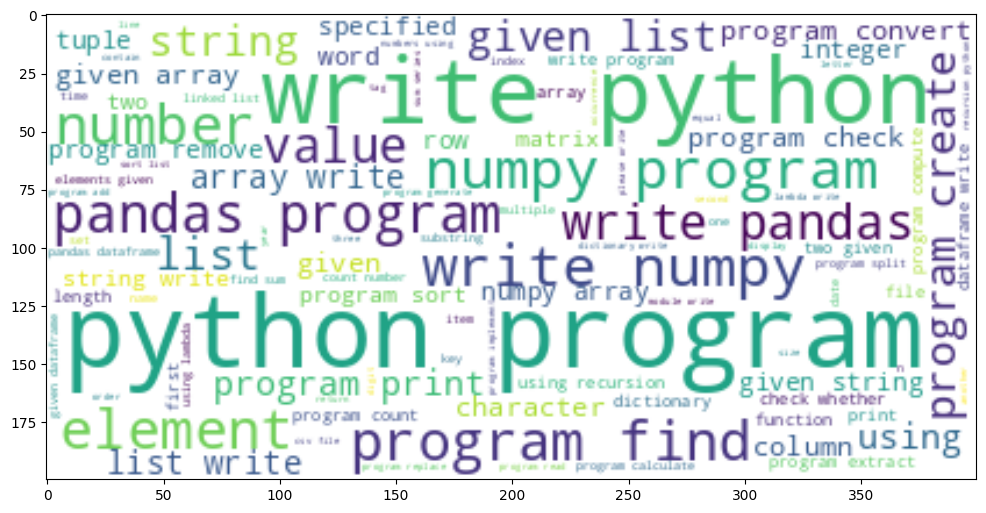

In [114]:
text = ' '.join(i for i in df['clean_problem'])

word_cloud = WordCloud(max_words=100, background_color='White').generate(text)

plt.figure(figsize=(12,12))

plt.imshow(word_cloud, interpolation='bilinear')

plt.show()